### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Identify the missing data count for each column
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
# Percent of missing data
(data.isna().sum()/data.shape[0])*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [6]:
# Identify any duplicate data
data.duplicated().sum()

74

In [7]:
# Remove Duplicate Data
data = data.drop_duplicates()

In [8]:
# Verify the duplicate is removed
data.duplicated().sum()

0

In [9]:
# Inspect Bar column
data['Bar'].value_counts()

Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64

In [10]:
# Inspect Coffee House column

data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: count, dtype: int64

In [11]:
# Inspect CarryAway column
data['CarryAway'].value_counts()

CarryAway
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
Name: count, dtype: int64

In [12]:
# Inspect RestaurantLessThan20 column
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
Name: count, dtype: int64

In [13]:
# Inspect Restaurant20To50 column
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6041
1~3      3266
never    2122
4~8       728
gt8       264
Name: count, dtype: int64

In [14]:
# Check the age column and change it to numeric
data['age'].value_counts()

age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

In [15]:
#replace 50plus with 51 and below21 with 20
data['age'] = pd.to_numeric(data['age'].replace({'50plus':51, 'below21':20}))

3. Decide what to do about your missing data -- drop, replace, other...

In [16]:
#drop the car column as it is not having any value and from the context every one drives vechile.
data.drop('car',axis=1,inplace=True)


In [17]:
# The columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 are having NaN value less than 2 %
# Imputing those columns with NaN with the most occurance of the value for that column

# Bar
data['Bar'].fillna(data['Bar'].value_counts().idxmax(),inplace=True)
# CoffeeHouse
data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().idxmax(),inplace=True)
# CarryAway
data['CarryAway'].fillna(data['CarryAway'].value_counts().idxmax(),inplace=True)
# RestaurantLessThan20
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().idxmax(),inplace=True)
# Restaurant20To50
data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().idxmax(),inplace=True)

In [18]:
# verify if the data has NaN after imputing
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 


In [19]:
# Calculate the perecentage of acceptence
data_coupon_precent = ((data['Y'].value_counts()/data.shape[0])*100).reset_index()

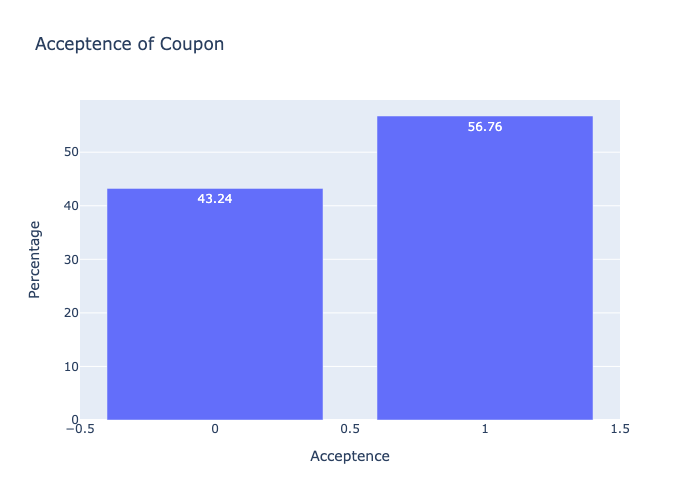

In [54]:
### ~57 % People chose to accept the coupon
fig = px.bar(data_coupon_precent, x = 'Y', y = 'count', title = 'Acceptence of Coupon', labels = {"Y" : "Acceptence", "count" : "Percentage"}, text_auto = '.2f' )
fig.show("png")

5. Use a bar plot to visualize the `coupon` column.

In [21]:
# Group the data by coupon and the passgener field or any field will give count
data_by_coupon = data.groupby('coupon').count()['passanger'].reset_index()

In [22]:
data_by_coupon

,coupon,passanger
0,Bar,2010
1,Carry out & Take away,2344
2,Coffee House,3989
3,Restaurant(20-50),1488
4,Restaurant(<20),2779


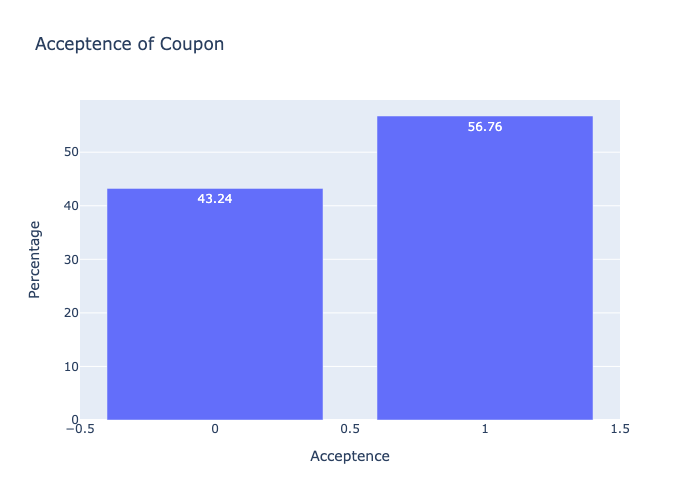

In [55]:
#Plot the Bar Chart with X as coupon and Y as the count of rows
fig1 = px.bar(data_by_coupon, x = 'coupon', y = 'passanger', title = 'Coupon Category', labels = {"coupon" : "Coupon", "passanger" : "Count"}, text_auto = True )
fig.show("png")

6. Use a histogram to visualize the temperature column.

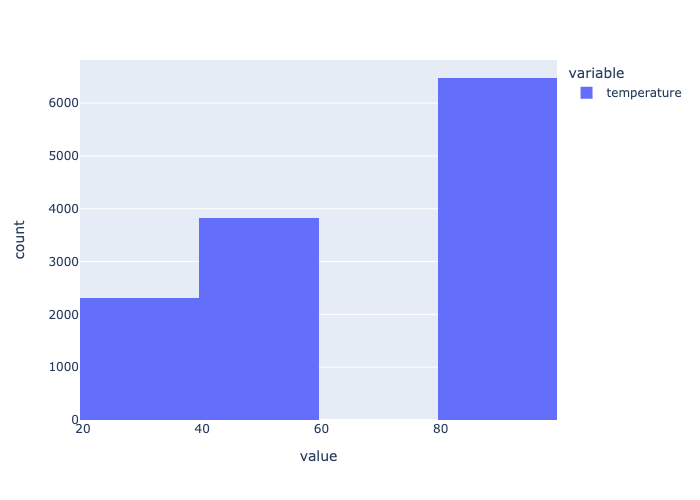

In [56]:
# Plot the histogram of temperature field
fig2 = px.histogram(data['temperature'])
fig2.show("png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
# Create a data frame by filtering coupon containing Bar
data_by_bar_coupon = data.query('coupon == "Bar"')
data_by_bar_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


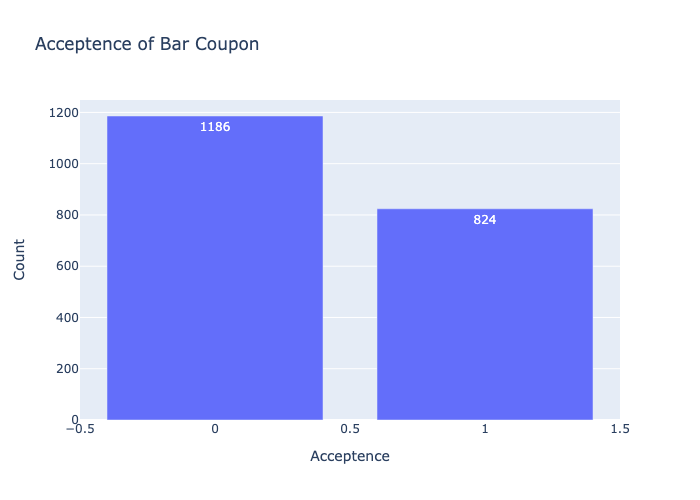

In [57]:
# Inspect the Bar Coupon Data Frame accepteance Field which gives statistics of the field

data_by_bar_coupon_acceptance = (data_by_bar_coupon['Y'].value_counts()).reset_index()

# Plot the bar chart to see how much coupon accepted vs not accepted

fig3 = px.bar(data_by_bar_coupon_acceptance, x = 'Y', y = 'count', title = 'Acceptence of Bar Coupon', labels = {"Y" : "Acceptence", "count" : "Count"}, text_auto = True )
fig3.show("png")

In [27]:
# Calculate the Bar coupon acceptance ratio by dividing the accepted and non accepted count by total count
data_by_bar_coupon_acceptance['ratio'] = data_by_bar_coupon_acceptance['count']/data_by_bar_coupon_acceptance['count'].sum()
data_by_bar_coupon_acceptance

,Y,count,ratio
0,0,1186,0.59005
1,1,824,0.40995


Text(0.5, 1.0, 'Bar Coupon Acceptance Ratio ')

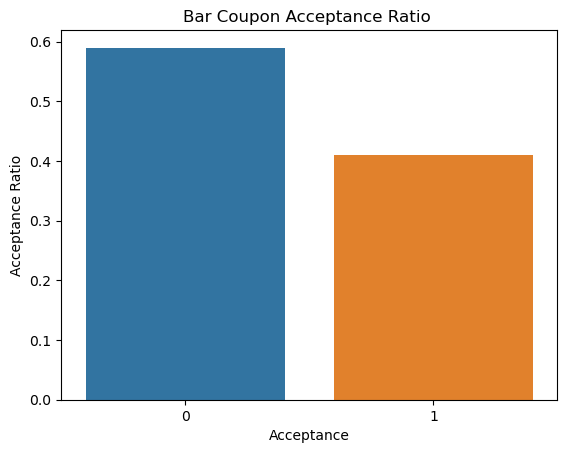

In [28]:
# Plot the Bar chart for Bar coupon acceptance ratio using Seaborn

fig = sns.barplot(data=data_by_bar_coupon_acceptance, x='Y',y='ratio')
fig.set(xlabel = 'Acceptance', ylabel = 'Acceptance Ratio')
fig.set_title('Bar Coupon Acceptance Ratio ')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [29]:
# The Bar field has the value of those who went to bar 3 or more times hence group by that column along with acceptance column
data_by_bar_coupon_Bar = (data_by_bar_coupon.groupby(by=['Bar','Y']).count())['passanger'].reset_index()

# Define a function to seggregate the to Bar field value  into two categories of 3 or fewer and More than 3.
def get_bar_group(Bar):
    if Bar in ('1~3', 'less1' , 'never'):
        return '3 or fewer'
    else:
        return 'More than 3'
# Create a addition column in the data frame called Bar Group and call the above function to assign catagorical value based on Bar field 
data_by_bar_coupon_Bar['Bar_Group'] = data_by_bar_coupon_Bar['Bar'].apply(get_bar_group)

# Create a additional column passner_count to get store the value count
data_by_bar_coupon_Bar['passanger_count'] = data_by_bar_coupon_Bar['passanger']
data_by_bar_coupon_Bar

,Bar,Y,passanger,Bar_Group,passanger_count
0,1~3,0,140,3 or fewer,140
1,1~3,1,257,3 or fewer,257
2,4~8,0,33,More than 3,33
3,4~8,1,117,More than 3,117
4,gt8,0,13,More than 3,13
5,gt8,1,36,More than 3,36
6,less1,0,313,3 or fewer,313
7,less1,1,250,3 or fewer,250
8,never,0,687,3 or fewer,687
9,never,1,164,3 or fewer,164


In [30]:
# Group the data by Bar Group and Acceptance
data_by_bar_coupon_Bar_Group = data_by_bar_coupon_Bar.groupby(by = ['Bar_Group','Y']).agg({'passanger':'sum'}).reset_index()
data_by_bar_coupon_Bar_Group

,Bar_Group,Y,passanger
0,3 or fewer,0,1140
1,3 or fewer,1,671
2,More than 3,0,46
3,More than 3,1,153


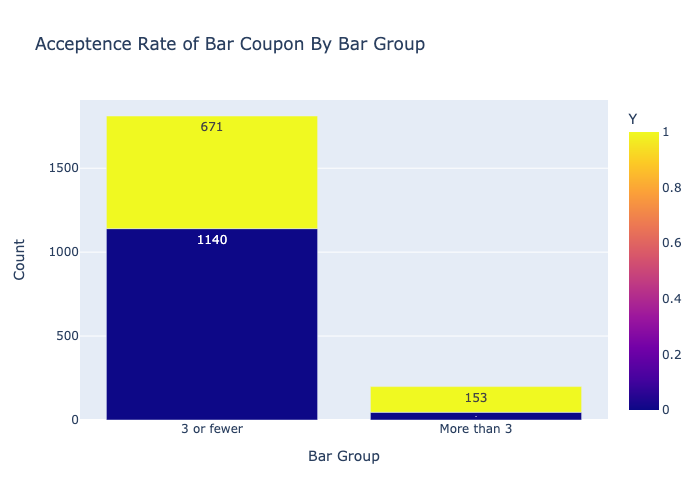

In [58]:
# Plot the Bar chart for the Bar Group data

fig4 = px.bar(data_by_bar_coupon_Bar_Group, x = 'Bar_Group', y = 'passanger', color = 'Y',
       title = 'Acceptence Rate of Bar Coupon By Bar Group', 
       labels = {"Bar_Group" : "Bar Group", "passanger" : "Count"}, text_auto = True )
fig4.show("png")

In [32]:
# Calculate the ration of accceptance for the Bar Group data
data_by_bar_coupon_Bar_Group['Ratio'] = data_by_bar_coupon_Bar_Group['passanger']/data_by_bar_coupon_Bar_Group['passanger'].sum()
data_by_bar_coupon_Bar_Group

,Bar_Group,Y,passanger,Ratio
0,3 or fewer,0,1140,0.567164
1,3 or fewer,1,671,0.333831
2,More than 3,0,46,0.022886
3,More than 3,1,153,0.076119


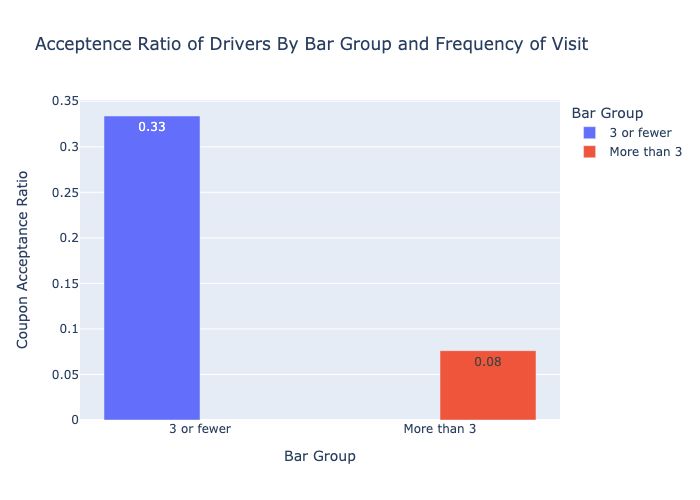

In [59]:
# Plot the Bar chart for the Bar Group data frame

fig5 = px.bar(data_by_bar_coupon_Bar_Group.query("Y == 1"), x = 'Bar_Group', y = 'Ratio', color = 'Bar_Group',
       barmode='group',text_auto = '.2f',
       title = 'Acceptence Ratio of Drivers By Bar Group and Frequency of Visit ', 
       labels = {"Bar_Group" : "Bar Group", "Ratio" : "Coupon Acceptance Ratio"} )
fig5.show("png")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [34]:
# Group the data by Age and Acceptance and Bar Field
data_by_bar_coupon_by_age =  (data_by_bar_coupon.groupby(by=['age','Y','Bar']).count())['passanger'].reset_index()

# Define a function to seggregate the to Bar field value into two categories of Less than Once and More than Once.
def get_bar_group(Bar):
    if Bar in ('less1' , 'never'):
        return 'Less than Once'
    else:
        return 'More than Once'

# Create a addition column in the data frame called Bar Group and call the above function to assign catagorical value based on Bar field 

data_by_bar_coupon_by_age['bar_grp'] = data_by_bar_coupon_by_age['Bar'].apply(get_bar_group)

# Define a function to seggregate the to Age field value into two categories of 25 and Under and Over 25.

def get_age_group(age):
    if age <= 25:
        return '25 and Under'
    else:
        return 'Over 25'

# Create a addition column in the data frame called Age Group and call the above function get_age_group to assign catagorical value based on Age field 

data_by_bar_coupon_by_age['age_grp'] = data_by_bar_coupon_by_age['age'].apply(get_age_group)

# Group the data by Age Group, Bar Group and Acceptance

data_by_bar_coupon_by_age_group = data_by_bar_coupon_by_age.groupby(by = ['age_grp','bar_grp','Y']).agg({'passanger':'sum'}).reset_index()

# Calculate the Acceptance Ratio  
data_by_bar_coupon_by_age_group['Ratio'] = data_by_bar_coupon_by_age_group['passanger']/data_by_bar_coupon_by_age_group['passanger'].sum()
data_by_bar_coupon_by_age_group.query("Y == 1")

,age_grp,bar_grp,Y,passanger,Ratio
1,25 and Under,Less than Once,1,129,0.064179
3,25 and Under,More than Once,1,118,0.058706
5,Over 25,Less than Once,1,285,0.141791
7,Over 25,More than Once,1,292,0.145274


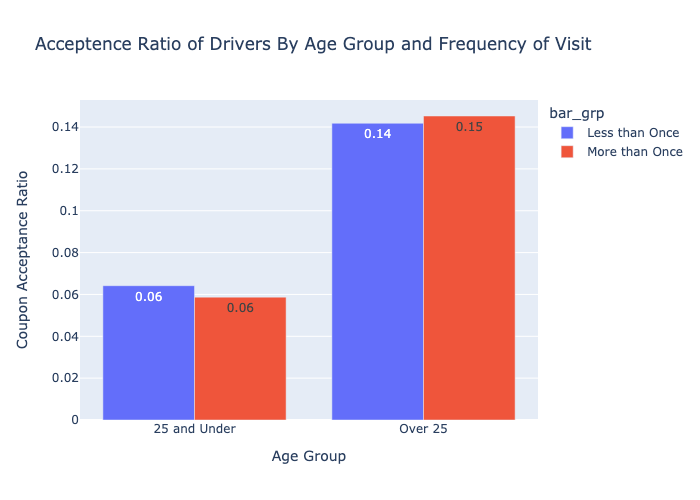

In [60]:
# Plot the Bar Chart for the Data by Age Group, Bar Group and Acceptance
fig6 = px.bar(data_by_bar_coupon_by_age_group.query("Y == 1"), x = 'age_grp', y = 'Ratio', color = 'bar_grp',
       barmode='group',text_auto = '.2f',
       title = 'Acceptence Ratio of Drivers By Age Group and Frequency of Visit ', 
       labels = {"age_grp" : "Age Group", "Ratio" : "Coupon Acceptance Ratio"} )
fig6.show("png")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [36]:
pd.options.mode.copy_on_write = True

# Create a data frame with passanger not having kids and occupation other than farming, fishing or forestry

data_no_kid_farm = data_by_bar_coupon.query("passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'")

# Create a addition column in the data frame called Bar Group and call the above function get_bar_group to assign catagorical value based on Bar field 

data_no_kid_farm['bar_grp'] = data_no_kid_farm['Bar'].apply(get_bar_group)

# Group the data by Bar Group and Acceptance

data_no_kid_farm_by_bar_grp =  (data_no_kid_farm.groupby(by=['bar_grp','Y']).count())['passanger'].reset_index()

# Calculate the Acceptance Ratio

data_no_kid_farm_by_bar_grp['Ratio'] = data_no_kid_farm_by_bar_grp['passanger']/data_no_kid_farm_by_bar_grp['passanger'].sum()
data_no_kid_farm_by_bar_grp

,bar_grp,Y,passanger,Ratio
0,Less than Once,0,864,0.480000
1,Less than Once,1,385,0.213889
2,More than Once,0,158,0.087778
3,More than Once,1,393,0.218333


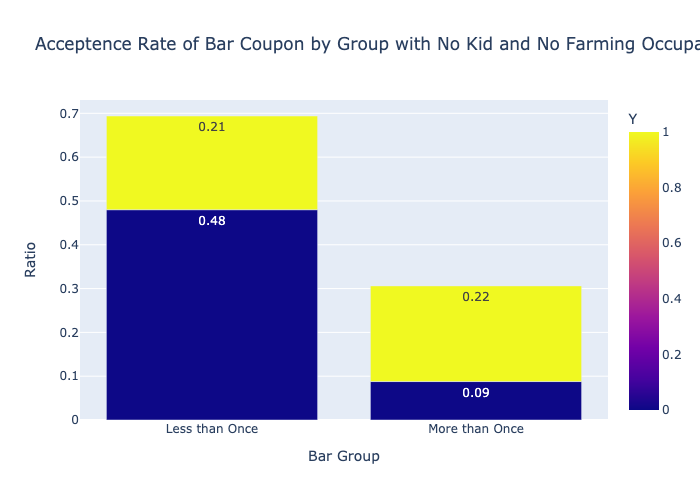

In [61]:
# Plot the Bar Chart for the Data by Age Group 

fig7 = px.bar(data_no_kid_farm_by_bar_grp, x = 'bar_grp', y = 'Ratio', color = 'Y',
       title = 'Acceptence Rate of Bar Coupon by Group with No Kid and No Farming Occupation', 
       labels = {"bar_grp" : "Bar Group", "Ratio" : "Ratio"}, text_auto = '.2f' )
fig7.show("png")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [38]:
# Inspect the RestaurantLessThan20 field so that we can identify how to categorize the resurants more than 4 times a month
data_by_bar_coupon['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [39]:
# Create a addition column in the data frame called Bar Group and call the above function get_bar_group to assign catagorical value based on Bar field 

data_by_bar_coupon['bar_grp'] = data_by_bar_coupon['Bar'].apply(get_bar_group)

# Create data frame for the Criteria 1 - go to bars more than once a month, had passengers that were not a kid, and were not widowed 

data_by_bar_coupon_6_1 = data_by_bar_coupon.query("passanger != 'Kid(s)'and maritalStatus != 'Widowed'").groupby(by=['bar_grp','Y']).count()['passanger'].reset_index()

# Calculate the Acceptance Ratio

data_by_bar_coupon_6_1['Ratio'] = data_by_bar_coupon_6_1['passanger']/data_by_bar_coupon_6_1['passanger'].sum()

# Get the Ratio Value alone for the Criteria 1

data_by_bar_coupon_6_1.query("bar_grp == 'More than Once' and Y == 1")['Ratio'].iloc[0]


# Create data frame for the Criteria 2 - go to bars more than once a month and are under the age of 30 

data_by_bar_coupon_6_2 = data_by_bar_coupon.query("age < 30").groupby(by=['bar_grp','Y']).count()['passanger'].reset_index()

# Calculate the Acceptance Ratio

data_by_bar_coupon_6_2['Ratio'] = data_by_bar_coupon_6_2['passanger']/data_by_bar_coupon_6_2['passanger'].sum()

# Get the Ratio Value alone for the Criteria 2
data_by_bar_coupon_6_2.query("bar_grp == 'More than Once' and Y == 1")['Ratio'].iloc[0]


# Create a income list for income less than 50K

income_less_50k_list = ['$37500 - $49999', '$12500 - $24999','$25000 - $37499','Less than $12500']

# Create cheap resutrant list

cheap_resturant_list = ['4~8', 'gt8']

# Filter the data by income list

data_by_bar_coupon_6_3 = data_by_bar_coupon[data_by_bar_coupon['income'].isin(income_less_50k_list)]

# Filter the data by cheap resturant list

data_by_bar_coupon_6_3 = data_by_bar_coupon_6_3[data_by_bar_coupon_6_3['RestaurantLessThan20'].isin(cheap_resturant_list)]

# Create data frame for the Criteria 3 - go to cheap restaurants more than 4 times a month and income is less than 50K

data_by_bar_coupon_6_3 = data_by_bar_coupon_6_3.groupby(by=['Y']).count()['passanger'].reset_index()

# Calculate the Acceptance Ratio

data_by_bar_coupon_6_3['Ratio'] = data_by_bar_coupon_6_2['passanger']/data_by_bar_coupon_6_2['passanger'].sum()

# Get the Ratio Value alone for the Criteria 3

data_by_bar_coupon_6_3.query("Y == 1")['Ratio'].iloc[0]

# Create the data frame for with the ratio for all the three criteria

data_by_bar_coupon_6 = [data_by_bar_coupon_6_1.query("bar_grp == 'More than Once' and Y == 1")['Ratio'].iloc[0],data_by_bar_coupon_6_2.query("bar_grp == 'More than Once' and Y == 1")['Ratio'].iloc[0],data_by_bar_coupon_6_3.query("Y == 1")['Ratio'].iloc[0]]
data_by_bar_coupon_6

[0.22016806722689075, 0.27697441601779754, 0.21245828698553948]

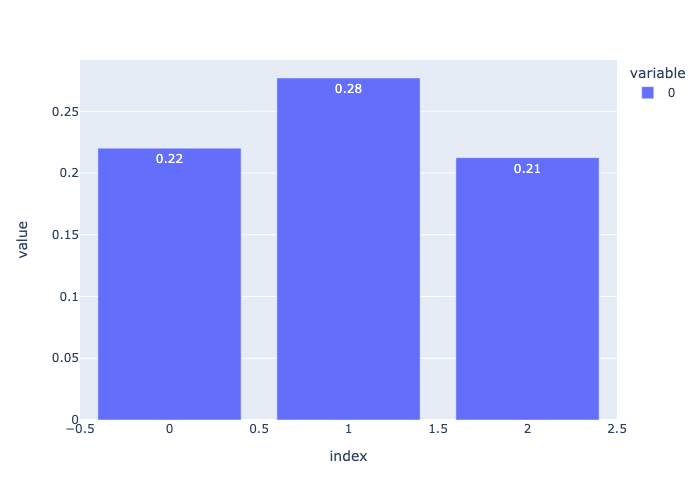

In [62]:
# Plot the bar chart to compare the ratio between all the three criteria

fig8 = px.bar(data_by_bar_coupon_6,text_auto='.2f')
fig8.show("png")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Observations
```
1. The Bar Coupon has 41 % Acceptance Rate
2. The acceptance rate is higher for the those went to a bar 3 or fewer times a month compared to those who went more than 3 times.
3. There is no difference in the acceptance rate for those who are over the age of 25 based on frequency of visit and same for those who are under 25 as well. 
4. The acceptance rate for drivers who had passengers that were not a kid and had occupations other than farming, fishing, or forestry is similar (22%) irrespective of if they go more than once or less than once a month.
5. The acceptance rates for drivers go to bars more than once a month and are under age has slightly higher acceptance rate(28%) compared to drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed(22%) and drivers go to cheap restaurants more than 4 times a month and income is less than 50K.

```

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [41]:
# Create data frame with Coffee House Coupon Alone
data_coffee_coupon = data.query('coupon == "Coffee House"')
data_coffee_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of Coffee House were accepted

In [42]:
# Inspect the Coffee House Coupon Data Frame accepteance Field which gives statistics of the field
data_coffee_coupon_acceptance = (data_coffee_coupon['Y'].value_counts()).reset_index()

data_coffee_coupon_acceptance

,Y,count
0,0,2000
1,1,1989


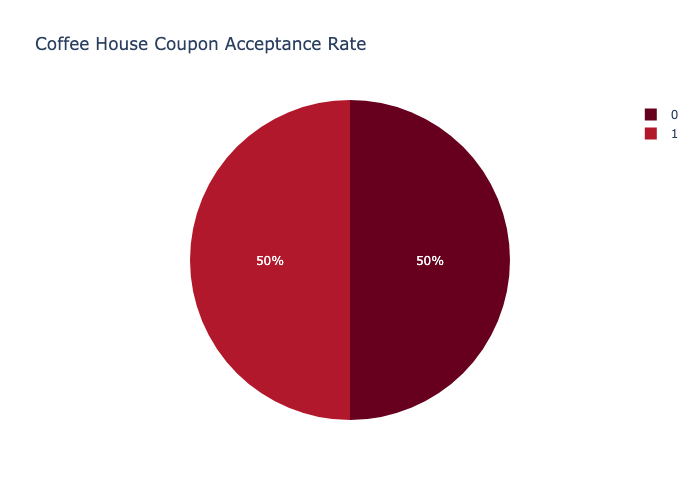

In [63]:
# Plot the pie chart to see the acceptance percentage

fig9 = px.pie(data_coffee_coupon_acceptance, names='Y',color_discrete_sequence=px.colors.sequential.RdBu,
      title='Coffee House Coupon Acceptance Rate')
fig9.show("png")

3. What proportion of Coffee House were accepted if it is in the same direction vs direction opposite

In [44]:
# Create a data frame groupby the venue is in the same direction or opposite direction as the destination

data_coffee_coupon_acceptance_by_direction = (data_coffee_coupon.query('Y == 1').groupby(by=['direction_same','direction_opp','Y']).count())['passanger'].reset_index()
data_coffee_coupon_acceptance_by_direction

,direction_same,direction_opp,Y,passanger
0,0,1,1,1592
1,1,0,1,397


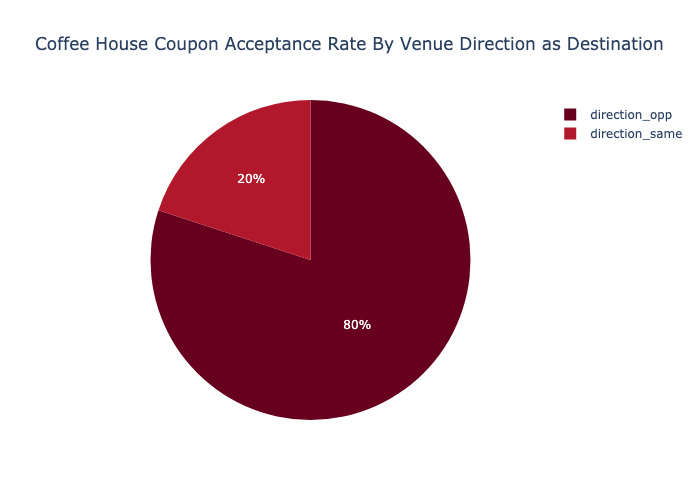

In [64]:
# Plot the Pie chart to see the percentage of the acceptance. Since the data has direction_same and direction_opposite are mutually exclusive

fig10 = px.pie(data_coffee_coupon_acceptance_by_direction, values = 'passanger',names=['direction_opp','direction_same'],color_discrete_sequence=px.colors.sequential.RdBu,
      title='Coffee House Coupon Acceptance Rate By Venue Direction as Destination')
fig10.show("png")

4. Acceptance rate by destination

In [46]:
# Create a data frame with group by destination

data_coffee_coupon_dest = data_coffee_coupon.groupby(by=['destination','Y']).count()['passanger'].reset_index()

# Calculate the Acceptance Ratio

data_coffee_coupon_dest['Ratio'] = data_coffee_coupon_dest['passanger']/data_coffee_coupon_dest['passanger'].sum()
data_coffee_coupon_dest

,destination,Y,passanger,Ratio
0,Home,0,591,0.148157
1,Home,1,335,0.083981
2,No Urgent Place,0,903,0.226373
3,No Urgent Place,1,1247,0.312610
4,Work,0,506,0.126849
5,Work,1,407,0.102031


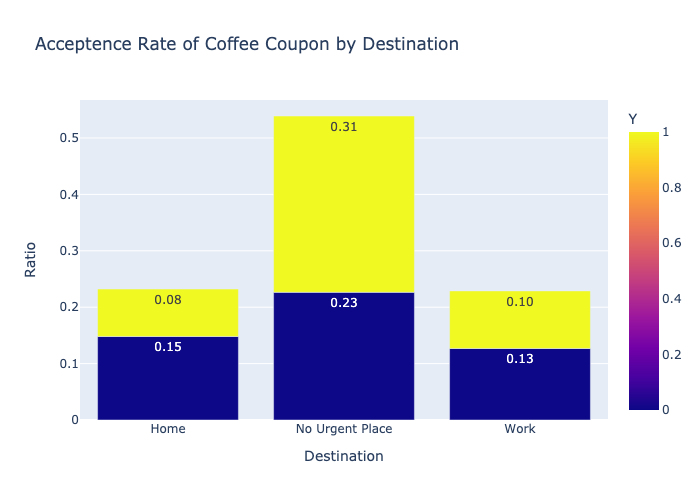

In [65]:
# Plot the Bar Chart for the Acceptance Rate of Coffee Coupon by Destination

fig11 = px.bar(data_coffee_coupon_dest, x = 'destination', y = 'Ratio', color = 'Y',
       title = 'Acceptence Rate of Coffee Coupon by Destination', 
       labels = {"destination" : "Destination", "Ratio" : "Ratio"}, text_auto = '.2f' )
fig11.show("png")

5. Acceptance rate by GEQ

In [48]:
# Create a data frame with group by Geograpocal Location Distance of the Venue


data_coffee_coupon_GEQ = data_coffee_coupon.query('Y ==1').groupby(by=['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']).count()['passanger'].reset_index()
data_coffee_coupon_GEQ

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,passanger
0,1,0,0,1050
1,1,1,0,832
2,1,1,1,107


6. Acceptance rate by temperature

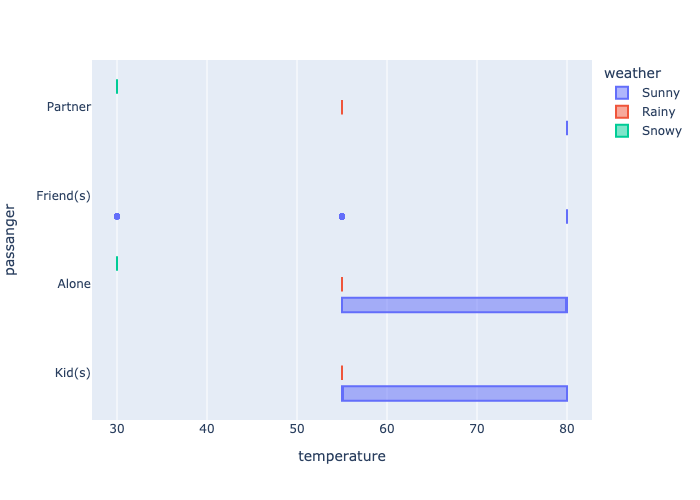

In [66]:
# Plot the Box chart for the Acceptance Rate by temperature and Passanger
fig12 = px.box(data_coffee_coupon.query('Y ==1'), x = 'temperature', y = 'passanger',color = 'weather')
fig12.show("png")

7. Acceptance rate by occupation

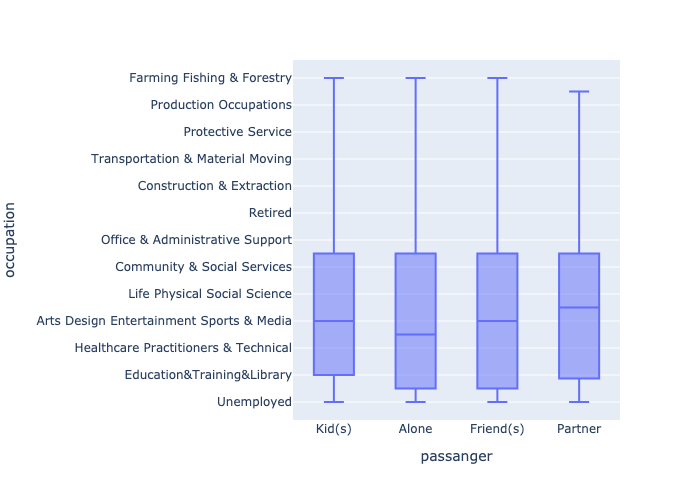

In [69]:
# Plot the Box chart for the Acceptance Rate by Occupation

fig13 = px.box(data_coffee_coupon.query('Y ==1'), x = 'passanger', y = 'occupation')
fig13.show("png")

### Coffee House Coupon Observations
1. The Coffee House Coupon has 50 % Acceptance Rate
2. Suprisingly 80 % drivers tend to accept the coupon even if the venue is in opposite direction
3. The Acceptance rate is higher for No Urgent Destination and lower for the people who are going home
4. More people go to the venue with in 5 mins of travel duration
5. The Driver with Kids or Alone has more acceptance percentage and prefer to go there during Sunny weather.
6. The Acceptane Rate is higher for the driver in the below occupation irrespective of passager in the car.
	Education&Training&Library
	Healthcare Support
	Healthcare Practitioners & Technical 
	Management
	Arts Design Entertainment Sports & Media
	Computer & Mathematical
	Life Physical Social Science  
	Personal Care & Service
	Community & Social Services
	Sales & Related